# Preprocessing

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import time
import openpyxl as xls

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('dataset/data_obesitas.csv')
data

,jenis_kelamin,umur,tinggi_badan_meter,berat_badan_kilogram,histori_keluarga_kelebihan_BB,konsumsi_tinggi_kalori,konsumsi_sayuran,makan_berat,ngemil,merokok,konsumsi_air_liter,pemantauan_kalori,aktifitas_fisik,penggunaan_perangkat_teknologi,konsumsi_alkohol,transporasi_biasa_digunakan,kelas_obesitas
0,Perempuan,21,1.62,64,Ya,Tidak,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Sepeda motor,kelebihan_berat_badan
1,Perempuan,21,1.52,56,Ya,Tidak,Selalu,3x,Kadang-kadang,Ya,Lebih 2 liter,Ya,4-5 hari,0-2 jam,Kadang-kadang,Sepeda motor,kelebihan_berat_badan
2,Laki-laki,29,1.62,53,Tidak,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,normal
3,Perempuan,23,1.50,55,Ya,Ya,Selalu,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,1-2 hari,0-2 jam,Kadang-kadang,Transportasi umum,kelebihan_berat_badan
4,Laki-laki,22,1.64,53,Tidak,Tidak,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,4-5 hari,0-2 jam,Kadang-kadang,Sepeda motor,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,Perempuan,37,1.55,76,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,1-2 hari,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II
444,Perempuan,39,1.56,76,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II
445,Perempuan,37,1.50,75,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II
446,Perempuan,41,1.54,77,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,Lebih 2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   jenis_kelamin                   448 non-null    object 
 1   umur                            448 non-null    int64  
 2   tinggi_badan_meter              448 non-null    float64
 3   berat_badan_kilogram            448 non-null    int64  
 4   histori_keluarga_kelebihan_BB   448 non-null    object 
 5   konsumsi_tinggi_kalori          448 non-null    object 
 6   konsumsi_sayuran                448 non-null    object 
 7   makan_berat                     448 non-null    object 
 8   ngemil                          448 non-null    object 
 9   merokok                         448 non-null    object 
 10  konsumsi_air_liter              448 non-null    object 
 11  pemantauan_kalori               448 non-null    object 
 12  aktifitas_fisik                 448 

### distribusi kelas 

In [4]:
kelas_obesitas = data['kelas_obesitas'].value_counts().rename_axis('kelas_obesitas').reset_index(name='jumlah')
urutan_obesitas = ['berat_badan_kurang',
                'normal',
                'kelebihan_berat_badan',
                'obesitas_I',
                'obesitas_II']
kelas_obesitas['kelas_obesitas'] = pd.Categorical(kelas_obesitas['kelas_obesitas'], categories=urutan_obesitas, ordered=True)
kelas_obesitas = kelas_obesitas.sort_values(by='kelas_obesitas')
kelas_obesitas

,kelas_obesitas,jumlah
2,berat_badan_kurang,85
0,normal,141
3,kelebihan_berat_badan,71
1,obesitas_I,85
4,obesitas_II,66


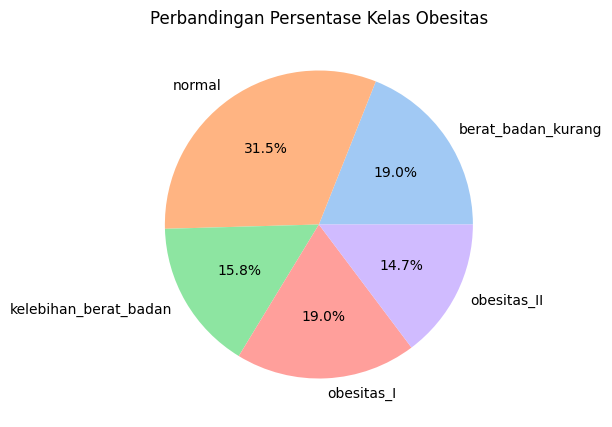

In [5]:
plt.figure(figsize=(5, 5))
colors = sns.color_palette('pastel')

plt.pie(kelas_obesitas['jumlah'], labels=kelas_obesitas['kelas_obesitas'], autopct='%1.1f%%', colors=colors)

plt.title('Perbandingan Persentase Kelas Obesitas')
plt.show()

### cek outlier

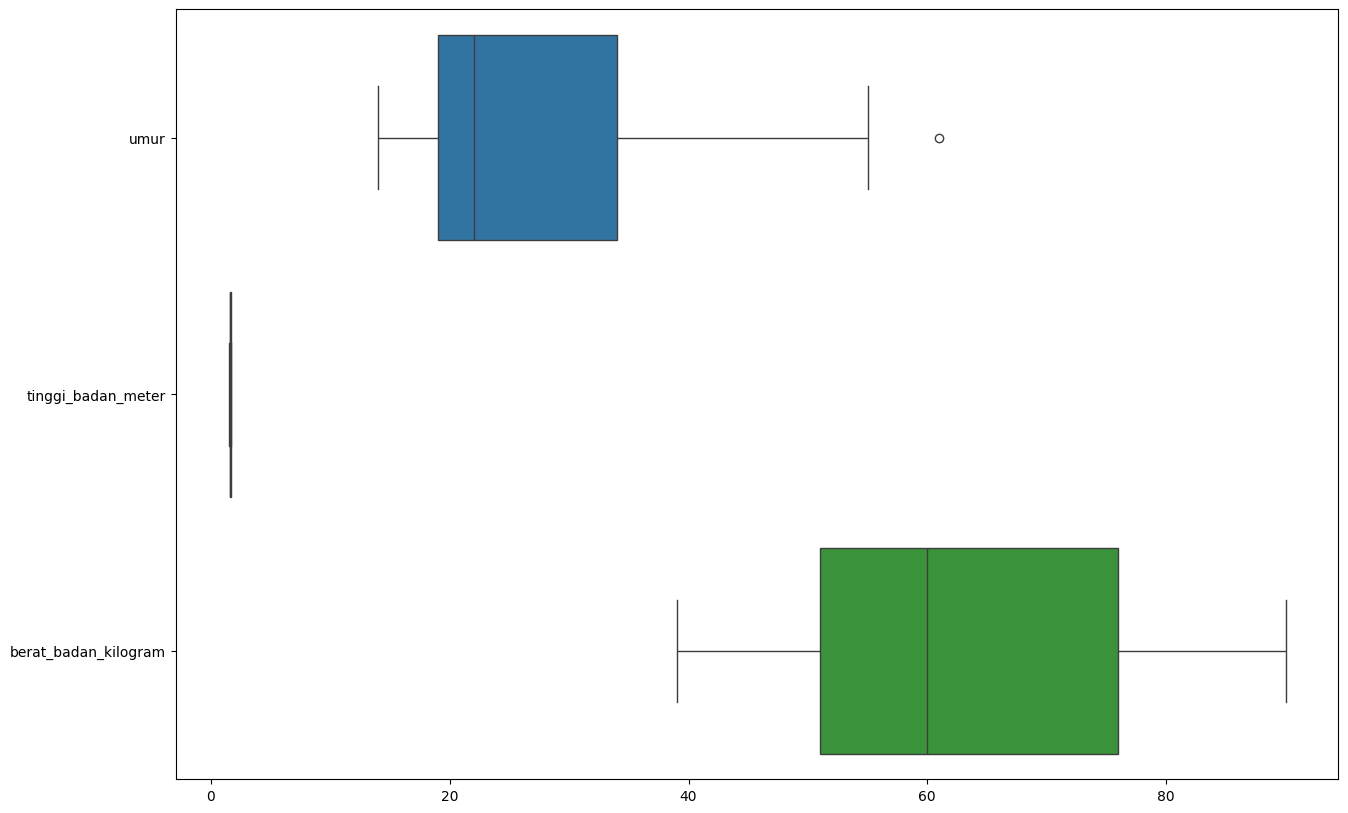

In [6]:
plt.figure(figsize = (15,10))
sns.boxplot(data = data, orient='h')

plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   jenis_kelamin                   448 non-null    object 
 1   umur                            448 non-null    int64  
 2   tinggi_badan_meter              448 non-null    float64
 3   berat_badan_kilogram            448 non-null    int64  
 4   histori_keluarga_kelebihan_BB   448 non-null    object 
 5   konsumsi_tinggi_kalori          448 non-null    object 
 6   konsumsi_sayuran                448 non-null    object 
 7   makan_berat                     448 non-null    object 
 8   ngemil                          448 non-null    object 
 9   merokok                         448 non-null    object 
 10  konsumsi_air_liter              448 non-null    object 
 11  pemantauan_kalori               448 non-null    object 
 12  aktifitas_fisik                 448 

### transformasi

In [8]:
data['jenis_kelamin'] = data['jenis_kelamin'].replace('Laki-laki', 1)
data['jenis_kelamin'] = data['jenis_kelamin'].replace('Perempuan', 0)

data['histori_keluarga_kelebihan_BB'] = data['histori_keluarga_kelebihan_BB'].replace('Ya', 1)
data['histori_keluarga_kelebihan_BB'] = data['histori_keluarga_kelebihan_BB'].replace('Tidak', 0)

data['konsumsi_tinggi_kalori'] = data['konsumsi_tinggi_kalori'].replace('Ya', 1)
data['konsumsi_tinggi_kalori'] = data['konsumsi_tinggi_kalori'].replace('Tidak', 0)

data['konsumsi_sayuran'] = data['konsumsi_sayuran'].replace('Selalu', 2)
data['konsumsi_sayuran'] = data['konsumsi_sayuran'].replace('Kadang-kadang', 1)
data['konsumsi_sayuran'] = data['konsumsi_sayuran'].replace('Tidak pernah', 0)

data['makan_berat'] = data['makan_berat'].replace('Lebih 3x', 3)
data['makan_berat'] = data['makan_berat'].replace('3x', 2)
data['makan_berat'] = data['makan_berat'].replace('1-2x', 1)

data['ngemil'] = data['ngemil'].replace('Selalu', 3)
data['ngemil'] = data['ngemil'].replace('Sering', 2)
data['ngemil'] = data['ngemil'].replace('Kadang-kadang', 1)
data['ngemil'] = data['ngemil'].replace('Tidak pernah', 0)

data['merokok'] = data['merokok'].replace('Ya', 1)
data['merokok'] = data['merokok'].replace('Tidak', 0)

data['konsumsi_air_liter'] = data['konsumsi_air_liter'].replace('Lebih 2 liter', 3)
data['konsumsi_air_liter'] = data['konsumsi_air_liter'].replace('1-2 liter', 2)
data['konsumsi_air_liter'] = data['konsumsi_air_liter'].replace('Kurang 1 liter', 1)

data['pemantauan_kalori'] = data['pemantauan_kalori'].replace('Ya', 1)
data['pemantauan_kalori'] = data['pemantauan_kalori'].replace('Tidak', 0)

data['aktifitas_fisik'] = data['aktifitas_fisik'].replace('4-5 hari', 3)
data['aktifitas_fisik'] = data['aktifitas_fisik'].replace('2-4 hari', 2)
data['aktifitas_fisik'] = data['aktifitas_fisik'].replace('1-2 hari', 1)
data['aktifitas_fisik'] = data['aktifitas_fisik'].replace('Tidak pernah', 0)

data['penggunaan_perangkat_teknologi'] = data['penggunaan_perangkat_teknologi'].replace('Lebih 5 jam', 3)
data['penggunaan_perangkat_teknologi'] = data['penggunaan_perangkat_teknologi'].replace('3-5 jam', 2)
data['penggunaan_perangkat_teknologi'] = data['penggunaan_perangkat_teknologi'].replace('0-2 jam', 1)

data['konsumsi_alkohol'] = data['konsumsi_alkohol'].replace('Selalu', 3)
data['konsumsi_alkohol'] = data['konsumsi_alkohol'].replace('Sering', 2)
data['konsumsi_alkohol'] = data['konsumsi_alkohol'].replace('Kadang-kadang', 1)
data['konsumsi_alkohol'] = data['konsumsi_alkohol'].replace('Tidak pernah', 0)

data['transporasi_biasa_digunakan'] = data['transporasi_biasa_digunakan'].replace('Mobil', 0)
data['transporasi_biasa_digunakan'] = data['transporasi_biasa_digunakan'].replace('Sepeda motor', 1)
data['transporasi_biasa_digunakan'] = data['transporasi_biasa_digunakan'].replace('Sepeda', 2)
data['transporasi_biasa_digunakan'] = data['transporasi_biasa_digunakan'].replace('Transportasi umum', 3)
data['transporasi_biasa_digunakan'] = data['transporasi_biasa_digunakan'].replace('Jalan kaki', 4)

data

,jenis_kelamin,umur,tinggi_badan_meter,berat_badan_kilogram,histori_keluarga_kelebihan_BB,konsumsi_tinggi_kalori,konsumsi_sayuran,makan_berat,ngemil,merokok,konsumsi_air_liter,pemantauan_kalori,aktifitas_fisik,penggunaan_perangkat_teknologi,konsumsi_alkohol,transporasi_biasa_digunakan,kelas_obesitas
0,0,21,1.62,64,1,0,1,2,1,0,2,0,0,1,0,1,kelebihan_berat_badan
1,0,21,1.52,56,1,0,2,2,1,1,3,1,3,1,1,1,kelebihan_berat_badan
2,1,29,1.62,53,0,1,1,2,1,0,2,0,0,1,1,4,normal
3,0,23,1.50,55,1,1,2,2,1,0,2,0,1,1,1,3,kelebihan_berat_badan
4,1,22,1.64,53,0,0,1,2,1,0,2,0,3,1,1,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0,37,1.55,76,1,1,1,2,1,0,2,0,1,1,1,4,obesitas_II
444,0,39,1.56,76,1,1,1,2,1,0,2,0,0,1,1,4,obesitas_II
445,0,37,1.50,75,1,1,1,2,1,0,2,0,0,1,1,4,obesitas_II
446,0,41,1.54,77,1,1,1,2,1,0,3,0,0,1,1,4,obesitas_II


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   jenis_kelamin                   448 non-null    int64  
 1   umur                            448 non-null    int64  
 2   tinggi_badan_meter              448 non-null    float64
 3   berat_badan_kilogram            448 non-null    int64  
 4   histori_keluarga_kelebihan_BB   448 non-null    int64  
 5   konsumsi_tinggi_kalori          448 non-null    int64  
 6   konsumsi_sayuran                448 non-null    int64  
 7   makan_berat                     448 non-null    int64  
 8   ngemil                          448 non-null    int64  
 9   merokok                         448 non-null    int64  
 10  konsumsi_air_liter              448 non-null    int64  
 11  pemantauan_kalori               448 non-null    int64  
 12  aktifitas_fisik                 448 

## Menyeimbangkan kelas

In [10]:
X = data.drop(columns='kelas_obesitas', axis = 1)
Y = data['kelas_obesitas']

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=0)

X_res, y_res = smote.fit_resample(X, Y)

data = pd.concat([X_res, y_res], axis=1)

print(data['kelas_obesitas'].value_counts())
data

kelebihan_berat_badan    141
normal                   141
obesitas_I               141
obesitas_II              141
berat_badan_kurang       141
Name: kelas_obesitas, dtype: int64


,jenis_kelamin,umur,tinggi_badan_meter,berat_badan_kilogram,histori_keluarga_kelebihan_BB,konsumsi_tinggi_kalori,konsumsi_sayuran,makan_berat,ngemil,merokok,konsumsi_air_liter,pemantauan_kalori,aktifitas_fisik,penggunaan_perangkat_teknologi,konsumsi_alkohol,transporasi_biasa_digunakan,kelas_obesitas
0,0,21,1.620000,64,1,0,1,2,1,0,2,0,0,1,0,1,kelebihan_berat_badan
1,0,21,1.520000,56,1,0,2,2,1,1,3,1,3,1,1,1,kelebihan_berat_badan
2,1,29,1.620000,53,0,1,1,2,1,0,2,0,0,1,1,4,normal
3,0,23,1.500000,55,1,1,2,2,1,0,2,0,1,1,1,3,kelebihan_berat_badan
4,1,22,1.640000,53,0,0,1,2,1,0,2,0,3,1,1,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0,37,1.560000,80,1,1,2,1,1,0,2,0,0,1,1,4,obesitas_II
701,0,34,1.606212,79,1,0,2,2,1,0,2,0,0,1,1,2,obesitas_II
702,0,38,1.545496,79,1,1,1,2,1,0,2,0,0,1,1,4,obesitas_II
703,0,37,1.566180,80,1,1,2,1,1,0,2,0,1,1,1,4,obesitas_II


In [12]:
kelas_obesitas = data['kelas_obesitas'].value_counts().rename_axis('kelas_obesitas').reset_index(name='jumlah')
urutan_obesitas = ['berat_badan_kurang',
                'normal',
                'kelebihan_berat_badan',
                'obesitas_I',
                'obesitas_II']
kelas_obesitas['kelas_obesitas'] = pd.Categorical(kelas_obesitas['kelas_obesitas'], categories=urutan_obesitas, ordered=True)
kelas_obesitas = kelas_obesitas.sort_values(by='kelas_obesitas')
kelas_obesitas

,kelas_obesitas,jumlah
4,berat_badan_kurang,141
1,normal,141
0,kelebihan_berat_badan,141
2,obesitas_I,141
3,obesitas_II,141


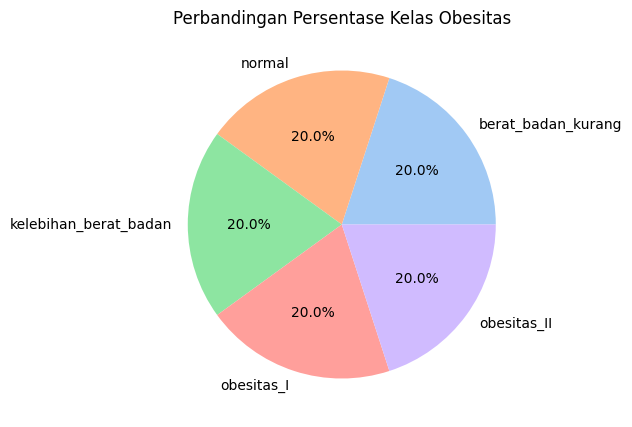

In [13]:
plt.figure(figsize=(5, 5))
colors = sns.color_palette('pastel')

plt.pie(kelas_obesitas['jumlah'], labels=kelas_obesitas['kelas_obesitas'], autopct='%1.1f%%', colors=colors)

plt.title('Perbandingan Persentase Kelas Obesitas')
plt.show()

### download data yang telah di-SMOTE

In [14]:
# excel_file = pd.ExcelWriter("smote_full_data_obesitas.xlsx")
# data.to_excel(excel_file, index=False)
# excel_file.save()

### rasio

In [15]:
test_size = 0.02

### Siap kan data untuk ditampilkan pada sistem

In [16]:
data_baru = data.copy()
data_baru

,jenis_kelamin,umur,tinggi_badan_meter,berat_badan_kilogram,histori_keluarga_kelebihan_BB,konsumsi_tinggi_kalori,konsumsi_sayuran,makan_berat,ngemil,merokok,konsumsi_air_liter,pemantauan_kalori,aktifitas_fisik,penggunaan_perangkat_teknologi,konsumsi_alkohol,transporasi_biasa_digunakan,kelas_obesitas
0,0,21,1.620000,64,1,0,1,2,1,0,2,0,0,1,0,1,kelebihan_berat_badan
1,0,21,1.520000,56,1,0,2,2,1,1,3,1,3,1,1,1,kelebihan_berat_badan
2,1,29,1.620000,53,0,1,1,2,1,0,2,0,0,1,1,4,normal
3,0,23,1.500000,55,1,1,2,2,1,0,2,0,1,1,1,3,kelebihan_berat_badan
4,1,22,1.640000,53,0,0,1,2,1,0,2,0,3,1,1,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0,37,1.560000,80,1,1,2,1,1,0,2,0,0,1,1,4,obesitas_II
701,0,34,1.606212,79,1,0,2,2,1,0,2,0,0,1,1,2,obesitas_II
702,0,38,1.545496,79,1,1,1,2,1,0,2,0,0,1,1,4,obesitas_II
703,0,37,1.566180,80,1,1,2,1,1,0,2,0,1,1,1,4,obesitas_II


In [17]:
data_baru['jenis_kelamin'] = data_baru['jenis_kelamin'].replace(1, 'Laki-laki')
data_baru['jenis_kelamin'] = data_baru['jenis_kelamin'].replace(0, 'Perempuan')

data_baru['histori_keluarga_kelebihan_BB'] = data_baru['histori_keluarga_kelebihan_BB'].replace(1, 'Ya')
data_baru['histori_keluarga_kelebihan_BB'] = data_baru['histori_keluarga_kelebihan_BB'].replace(0, 'Tidak')

data_baru['konsumsi_tinggi_kalori'] = data_baru['konsumsi_tinggi_kalori'].replace(1, 'Ya')
data_baru['konsumsi_tinggi_kalori'] = data_baru['konsumsi_tinggi_kalori'].replace(0, 'Tidak')

data_baru['konsumsi_sayuran'] = data_baru['konsumsi_sayuran'].replace(2, 'Selalu')
data_baru['konsumsi_sayuran'] = data_baru['konsumsi_sayuran'].replace(1, 'Kadang-kadang')
data_baru['konsumsi_sayuran'] = data_baru['konsumsi_sayuran'].replace(0, 'Tidak pernah')

data_baru['makan_berat'] = data_baru['makan_berat'].replace(3, 'Lebih 3x')
data_baru['makan_berat'] = data_baru['makan_berat'].replace(2, '3x')
data_baru['makan_berat'] = data_baru['makan_berat'].replace(1, '1-2x')

data_baru['ngemil'] = data_baru['ngemil'].replace(3, 'Selalu')
data_baru['ngemil'] = data_baru['ngemil'].replace(2, 'Sering')
data_baru['ngemil'] = data_baru['ngemil'].replace(1, 'Kadang-kadang')
data_baru['ngemil'] = data_baru['ngemil'].replace(0, 'Tidak pernah')

data_baru['merokok'] = data_baru['merokok'].replace(1, 'Ya')
data_baru['merokok'] = data_baru['merokok'].replace(0, 'Tidak')

data_baru['konsumsi_air_liter'] = data_baru['konsumsi_air_liter'].replace(3, 'Lebih 2 liter')
data_baru['konsumsi_air_liter'] = data_baru['konsumsi_air_liter'].replace(2, '1-2 liter')
data_baru['konsumsi_air_liter'] = data_baru['konsumsi_air_liter'].replace(1, 'Kurang 1 liter')

data_baru['pemantauan_kalori'] = data_baru['pemantauan_kalori'].replace(1, 'Ya')
data_baru['pemantauan_kalori'] = data_baru['pemantauan_kalori'].replace(0, 'Tidak')

data_baru['aktifitas_fisik'] = data_baru['aktifitas_fisik'].replace(3, '4-5 hari')
data_baru['aktifitas_fisik'] = data_baru['aktifitas_fisik'].replace(2, '2-4 hari')
data_baru['aktifitas_fisik'] = data_baru['aktifitas_fisik'].replace(1, '1-2 hari')
data_baru['aktifitas_fisik'] = data_baru['aktifitas_fisik'].replace(0, 'Tidak pernah')

data_baru['penggunaan_perangkat_teknologi'] = data_baru['penggunaan_perangkat_teknologi'].replace(3, 'Lebih 5 jam')
data_baru['penggunaan_perangkat_teknologi'] = data_baru['penggunaan_perangkat_teknologi'].replace(2, '3-5 jam')
data_baru['penggunaan_perangkat_teknologi'] = data_baru['penggunaan_perangkat_teknologi'].replace(1, '0-2 jam')

data_baru['konsumsi_alkohol'] = data_baru['konsumsi_alkohol'].replace(3, 'Selalu')
data_baru['konsumsi_alkohol'] = data_baru['konsumsi_alkohol'].replace(2, 'Sering')
data_baru['konsumsi_alkohol'] = data_baru['konsumsi_alkohol'].replace(1, 'Kadang-kadang')
data_baru['konsumsi_alkohol'] = data_baru['konsumsi_alkohol'].replace(0, 'Tidak pernah')

data_baru['transporasi_biasa_digunakan'] = data_baru['transporasi_biasa_digunakan'].replace(0, 'Mobil')
data_baru['transporasi_biasa_digunakan'] = data_baru['transporasi_biasa_digunakan'].replace(1, 'Sepeda motor')
data_baru['transporasi_biasa_digunakan'] = data_baru['transporasi_biasa_digunakan'].replace(2, 'Sepeda')
data_baru['transporasi_biasa_digunakan'] = data_baru['transporasi_biasa_digunakan'].replace(3, 'Transportasi umum')
data_baru['transporasi_biasa_digunakan'] = data_baru['transporasi_biasa_digunakan'].replace(4, 'Jalan kaki')

data_baru

,jenis_kelamin,umur,tinggi_badan_meter,berat_badan_kilogram,histori_keluarga_kelebihan_BB,konsumsi_tinggi_kalori,konsumsi_sayuran,makan_berat,ngemil,merokok,konsumsi_air_liter,pemantauan_kalori,aktifitas_fisik,penggunaan_perangkat_teknologi,konsumsi_alkohol,transporasi_biasa_digunakan,kelas_obesitas
0,Perempuan,21,1.620000,64,Ya,Tidak,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Sepeda motor,kelebihan_berat_badan
1,Perempuan,21,1.520000,56,Ya,Tidak,Selalu,3x,Kadang-kadang,Ya,Lebih 2 liter,Ya,4-5 hari,0-2 jam,Kadang-kadang,Sepeda motor,kelebihan_berat_badan
2,Laki-laki,29,1.620000,53,Tidak,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,normal
3,Perempuan,23,1.500000,55,Ya,Ya,Selalu,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,1-2 hari,0-2 jam,Kadang-kadang,Transportasi umum,kelebihan_berat_badan
4,Laki-laki,22,1.640000,53,Tidak,Tidak,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,4-5 hari,0-2 jam,Kadang-kadang,Sepeda motor,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Perempuan,37,1.560000,80,Ya,Ya,Selalu,1-2x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II
701,Perempuan,34,1.606212,79,Ya,Tidak,Selalu,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Sepeda,obesitas_II
702,Perempuan,38,1.545496,79,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II
703,Perempuan,37,1.566180,80,Ya,Ya,Selalu,1-2x,Kadang-kadang,Tidak,1-2 liter,Tidak,1-2 hari,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II


In [18]:
Xbaru = data_baru.drop(columns='kelas_obesitas', axis = 1)
Ybaru = data_baru['kelas_obesitas']
X_trainbaru, X_testbaru, Y_trainbaru, Y_testbaru  = train_test_split(data_baru, data_baru, test_size = test_size, stratify = Ybaru, random_state = 0)

In [19]:
X_trainbaru

,jenis_kelamin,umur,tinggi_badan_meter,berat_badan_kilogram,histori_keluarga_kelebihan_BB,konsumsi_tinggi_kalori,konsumsi_sayuran,makan_berat,ngemil,merokok,konsumsi_air_liter,pemantauan_kalori,aktifitas_fisik,penggunaan_perangkat_teknologi,konsumsi_alkohol,transporasi_biasa_digunakan,kelas_obesitas
167,Perempuan,23,1.700000,56,Tidak,Tidak,Selalu,Lebih 3x,Selalu,Tidak,Lebih 2 liter,Ya,4-5 hari,0-2 jam,Tidak pernah,Jalan kaki,normal
101,Perempuan,41,1.540000,80,Ya,Ya,Kadang-kadang,3x,Selalu,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II
680,Perempuan,37,1.500000,75,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Transportasi umum,obesitas_II
271,Perempuan,19,1.540000,42,Tidak,Ya,Selalu,1-2x,Sering,Tidak,1-2 liter,Tidak,1-2 hari,0-2 jam,Kadang-kadang,Sepeda motor,berat_badan_kurang
529,Perempuan,20,1.572607,59,Tidak,Ya,Kadang-kadang,1-2x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Sepeda motor,kelebihan_berat_badan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,Perempuan,20,1.670000,49,Ya,Ya,Selalu,Lebih 3x,Sering,Tidak,Lebih 2 liter,Tidak,2-4 hari,0-2 jam,Tidak pernah,Sepeda motor,berat_badan_kurang
151,Perempuan,21,1.530000,53,Tidak,Ya,Selalu,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,2-4 hari,0-2 jam,Kadang-kadang,Sepeda motor,normal
15,Laki-laki,22,1.650000,62,Tidak,Ya,Kadang-kadang,Lebih 3x,Sering,Tidak,1-2 liter,Tidak,2-4 hari,0-2 jam,Kadang-kadang,Sepeda motor,normal
0,Perempuan,21,1.620000,64,Ya,Tidak,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Sepeda motor,kelebihan_berat_badan


In [20]:
X_testbaru

,jenis_kelamin,umur,tinggi_badan_meter,berat_badan_kilogram,histori_keluarga_kelebihan_BB,konsumsi_tinggi_kalori,konsumsi_sayuran,makan_berat,ngemil,merokok,konsumsi_air_liter,pemantauan_kalori,aktifitas_fisik,penggunaan_perangkat_teknologi,konsumsi_alkohol,transporasi_biasa_digunakan,kelas_obesitas
606,Perempuan,31,1.672625,71,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_I
71,Perempuan,19,1.650000,56,Ya,Ya,Selalu,3x,Sering,Ya,Lebih 2 liter,Ya,1-2 hari,3-5 jam,Sering,Sepeda motor,normal
609,Perempuan,39,1.711621,84,Tidak,Ya,Selalu,1-2x,Kadang-kadang,Tidak,Lebih 2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Jalan kaki,obesitas_I
678,Perempuan,37,1.560000,79,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II
644,Perempuan,39,1.528746,79,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II
275,Perempuan,20,1.550000,41,Tidak,Ya,Selalu,1-2x,Sering,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Sepeda motor,berat_badan_kurang
173,Perempuan,21,1.540000,47,Ya,Tidak,Selalu,3x,Selalu,Tidak,1-2 liter,Tidak,2-4 hari,0-2 jam,Tidak pernah,Sepeda motor,normal
510,Perempuan,25,1.643548,62,Tidak,Tidak,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,1-2 hari,0-2 jam,Tidak pernah,Mobil,kelebihan_berat_badan
548,Perempuan,21,1.641347,66,Ya,Ya,Selalu,1-2x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Sepeda motor,kelebihan_berat_badan
389,Laki-laki,39,1.720000,86,Ya,Ya,Selalu,1-2x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Jalan kaki,obesitas_I


In [21]:
# excel_file = pd.ExcelWriter("smote_training_data_obesitas_baru.xlsx")
# X_trainbaru.to_excel(excel_file)
# excel_file.save()

In [22]:
# excel_file = pd.ExcelWriter("smote_testing_data_obesitas_baru.xlsx")
# X_testbaru.to_excel(excel_file)
# excel_file.save()

### Siap kan data untuk perhitungan manual

In [23]:
Y = data['kelas_obesitas']
X_trainhitung, X_testhitung, Y_trainhitung, Y_testhitung  = train_test_split(data, data, test_size = test_size, stratify = Y, random_state = 0)

In [24]:
data_pilih_kelas = X_trainhitung[X_trainhitung['kelas_obesitas'] == 'berat_badan_kurang']
data_pilih_kelas

,jenis_kelamin,umur,tinggi_badan_meter,berat_badan_kilogram,histori_keluarga_kelebihan_BB,konsumsi_tinggi_kalori,konsumsi_sayuran,makan_berat,ngemil,merokok,konsumsi_air_liter,pemantauan_kalori,aktifitas_fisik,penggunaan_perangkat_teknologi,konsumsi_alkohol,transporasi_biasa_digunakan,kelas_obesitas
271,0,19,1.540000,42,0,1,2,1,2,0,2,0,1,1,1,1,berat_badan_kurang
309,0,19,1.580000,44,0,0,2,2,2,0,2,1,0,1,1,1,berat_badan_kurang
266,0,19,1.530000,42,0,0,2,1,2,0,2,0,1,1,1,1,berat_badan_kurang
303,0,20,1.520000,42,0,1,2,1,2,0,2,0,0,1,1,1,berat_badan_kurang
291,0,20,1.520000,42,0,1,2,1,2,0,2,0,0,1,1,1,berat_badan_kurang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,36,1.645857,48,0,1,2,3,2,0,2,0,0,1,0,1,berat_badan_kurang
454,0,21,1.673182,49,1,1,2,2,2,0,3,0,0,1,0,1,berat_badan_kurang
227,0,19,1.540000,42,0,1,2,1,1,0,2,0,0,1,0,1,berat_badan_kurang
273,0,21,1.670000,49,1,1,2,2,2,0,3,0,0,1,0,1,berat_badan_kurang


In [25]:
data_pilih_kelas.describe()

,jenis_kelamin,umur,tinggi_badan_meter,berat_badan_kilogram,histori_keluarga_kelebihan_BB,konsumsi_tinggi_kalori,konsumsi_sayuran,makan_berat,ngemil,merokok,konsumsi_air_liter,pemantauan_kalori,aktifitas_fisik,penggunaan_perangkat_teknologi,konsumsi_alkohol,transporasi_biasa_digunakan
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,0.130435,20.115942,1.621892,46.065217,0.224638,0.644928,1.753623,1.891304,1.601449,0.007246,2.297101,0.072464,0.572464,1.021739,0.666667,1.021739
std,0.338008,3.582342,0.068071,3.765395,0.418864,0.480279,0.480444,0.751493,0.534091,0.085126,0.458646,0.260199,0.763087,0.146362,0.473122,0.307269
min,0.000000,16.000000,1.520000,39.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,19.000000,1.560000,42.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,20.000000,1.627689,45.000000,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.000000,21.000000,1.690000,49.000000,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,39.000000,1.720000,53.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,1.000000,4.000000


In [26]:
# excel_file = pd.ExcelWriter("smote_training_data_obesitas_hitung.xlsx")
# X_trainhitung.to_excel(excel_file)
# excel_file.save()

In [27]:
# excel_file = pd.ExcelWriter("smote_testing_data_obesitas_hitung.xlsx")
# X_testhitung.to_excel(excel_file)
# excel_file.save()

## Membagi atribut

In [28]:
X = data.drop(columns='kelas_obesitas', axis = 1)
Y = data['kelas_obesitas']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, stratify = Y, random_state = 0)

In [30]:
print('(baris,kolom)\n')
print('Jumlah data keseluruhan:', X.shape, '\nJumlah data training atau latih:', X_train.shape, '\nJumlah data test atau uji:', X_test.shape)

(baris,kolom)

Jumlah data keseluruhan: (705, 16) 
Jumlah data training atau latih: (690, 16) 
Jumlah data test atau uji: (15, 16)


In [31]:
Y_test.value_counts()

obesitas_I               3
normal                   3
obesitas_II              3
berat_badan_kurang       3
kelebihan_berat_badan    3
Name: kelas_obesitas, dtype: int64

# Normalisasi

In [32]:
minmax = MinMaxScaler()
minmax.fit(X_train)
X_train_nomalisasi = minmax.transform(X_train)
X_test_nomalisasi = minmax.transform(X_test)

# Model

## naive bayes

In [33]:
klasifikasiNV = GaussianNB()
start_time_NV = time.time()
klasifikasiNV.fit(X_train_nomalisasi, Y_train)
training_end_time_NV = time.time()
Y_predictNV = klasifikasiNV.predict(X_test_nomalisasi)
end_time_NV = time.time()
prediction_end_time_NV = time.time()

In [34]:
training_execution_time_NV = training_end_time_NV - start_time_NV
prediction_execution_time_NV = prediction_end_time_NV - training_end_time_NV
execution_time_NV1 = prediction_end_time_NV - start_time_NV
execution_time_NV2 = end_time_NV - start_time_NV

In [35]:
print(f"Waktu awal eksekusi Naive Bayes: {start_time_NV} detik")
print(f"Waktu akhir eksekusi Naive Bayes: {end_time_NV} detik")
print(f"Waktu pelatihan Naive Bayes: {training_execution_time_NV} detik")
print(f"Waktu uji Naive Bayes: {prediction_execution_time_NV} detik")
print(f"Total waktu eksekusi Naive Bayes: {execution_time_NV1} detik")
print(f"Total waktu eksekusi Naive Bayes: {execution_time_NV2} detik")

Waktu awal eksekusi Naive Bayes: 1717540795.9984713 detik
Waktu akhir eksekusi Naive Bayes: 1717540796.0061162 detik
Waktu pelatihan Naive Bayes: 0.00538182258605957 detik
Waktu uji Naive Bayes: 0.0022630691528320312 detik
Total waktu eksekusi Naive Bayes: 0.0076448917388916016 detik
Total waktu eksekusi Naive Bayes: 0.0076448917388916016 detik


In [36]:
evaluasiNV = classification_report(Y_test, Y_predictNV)
print(evaluasiNV)

                       precision    recall  f1-score   support

   berat_badan_kurang       0.75      1.00      0.86         3
kelebihan_berat_badan       0.50      0.33      0.40         3
               normal       0.50      0.33      0.40         3
           obesitas_I       1.00      0.33      0.50         3
          obesitas_II       0.50      1.00      0.67         3

             accuracy                           0.60        15
            macro avg       0.65      0.60      0.56        15
         weighted avg       0.65      0.60      0.56        15



In [37]:
label_unikNV = np.unique(np.concatenate((Y_test, Y_predictNV)))

# Membuat matriks kebingungan dengan label
matrixNV = confusion_matrix(Y_test, Y_predictNV, labels=label_unikNV)

# Membuat DataFrame dari matriks kebingungan
dataframe_CM_NV = pd.DataFrame(matrixNV, index=label_unikNV, columns=label_unikNV)

# Mengatur urutan baru
urutan_baru = ['berat_badan_kurang', 'normal', 'kelebihan_berat_badan', 'obesitas_I', 'obesitas_II']

# Menyusun ulang matriks dan DataFrame sesuai urutan baru
matrixNV_baru = dataframe_CM_NV.reindex(index=urutan_baru, columns=urutan_baru)
matrixNV_baru

,berat_badan_kurang,normal,kelebihan_berat_badan,obesitas_I,obesitas_II
berat_badan_kurang,3,0,0,0,0
normal,1,1,1,0,0
kelebihan_berat_badan,0,1,1,0,1
obesitas_I,0,0,0,1,2
obesitas_II,0,0,0,0,3


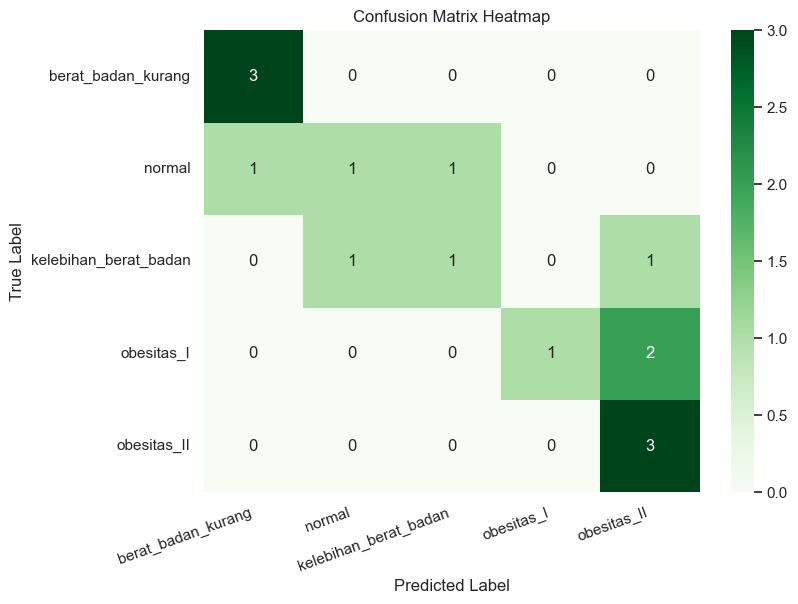

In [38]:
sns.set(font_scale=1)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(matrixNV_baru, annot=True, fmt="d", cmap="Greens", xticklabels=urutan_baru, yticklabels=urutan_baru)
heatmap.set_xlabel("Predicted Label")
heatmap.set_ylabel("True Label")
plt.xticks(rotation=20, ha='right')
heatmap.set_title("Confusion Matrix Heatmap")
plt.show()

## KNN

nilai K: 3 , memiliki akurasi 0.7814285714285714
nilai K: 4 , memiliki akurasi 0.85
nilai K: 5 , memiliki akurasi 0.85
nilai K: 6 , memiliki akurasi 0.9314285714285715
nilai K: 7 , memiliki akurasi 1.0
nilai K: 8 , memiliki akurasi 0.85
nilai K: 9 , memiliki akurasi 1.0
nilai K: 10 , memiliki akurasi 1.0


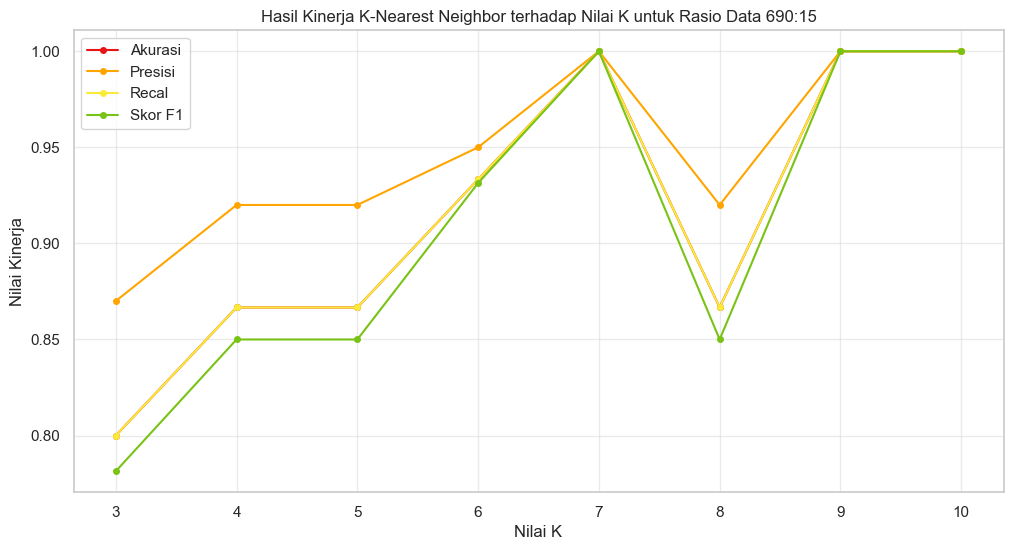

In [39]:
k_values = []
accuracy_values = []
precision_values = []
recall_values = []
f1_score_values = []
sns.set_style("whitegrid")
for k in range(3,11):
    klasifikasiKNN = KNeighborsClassifier(n_neighbors = k)
    klasifikasiKNN.fit(X_train_nomalisasi, Y_train)
    Y_predictKNN = klasifikasiKNN.predict(X_test_nomalisasi)
    akurasi = accuracy_score(Y_test, Y_predictKNN)
    presisi = precision_score(Y_test, Y_predictKNN, average='macro')
    recal = recall_score(Y_test, Y_predictKNN, average='macro')
    F1 = f1_score(Y_test, Y_predictKNN, average='macro')
    k =+ k
    k_values.append(k)
    accuracy_values.append(akurasi)
    precision_values.append(presisi)
    recall_values.append(recal)
    f1_score_values.append(F1)
    print('nilai K:',k, ', memiliki akurasi', F1)
    
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracy_values, marker='o', markersize=4, linestyle='-', color='#E81416', label='Akurasi')
plt.plot(k_values, precision_values, marker='o', markersize=4, linestyle='-', color='#FFA500', label='Presisi')
plt.plot(k_values, recall_values, marker='o', markersize=4, linestyle='-', color='#FAEB36', label='Recal')
plt.plot(k_values, f1_score_values, marker='o', markersize=4, linestyle='-', color='#79C314', label='Skor F1')

plt.title('Hasil Kinerja K-Nearest Neighbor terhadap Nilai K untuk Rasio Data 690:15')
plt.xlabel('Nilai K')
plt.ylabel('Nilai Kinerja')
plt.xticks(k_values)
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

nilai K: 3 , memiliki train 0.004224300384521484
nilai K: 3 , memiliki test 0.009124279022216797
nilai K: 4 , memiliki train 0.005000591278076172
nilai K: 4 , memiliki test 0.009795427322387695
nilai K: 5 , memiliki train 0.00208282470703125
nilai K: 5 , memiliki test 0.011575698852539062
nilai K: 6 , memiliki train 0.0027952194213867188
nilai K: 6 , memiliki test 0.011479854583740234
nilai K: 7 , memiliki train 0.002368927001953125
nilai K: 7 , memiliki test 0.010772466659545898
nilai K: 8 , memiliki train 0.0022971630096435547
nilai K: 8 , memiliki test 0.008573293685913086
nilai K: 9 , memiliki train 0.0019996166229248047
nilai K: 9 , memiliki test 0.007220029830932617


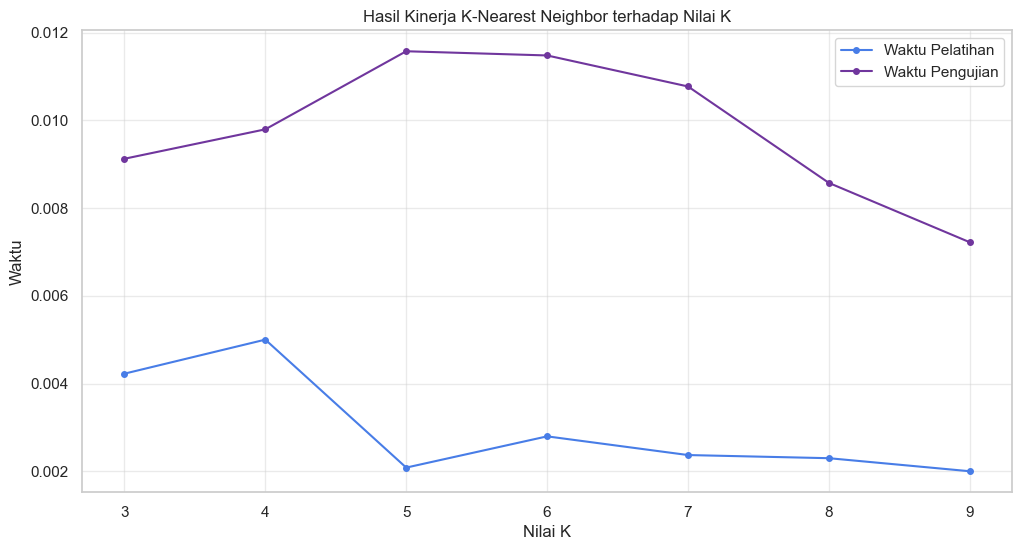

In [40]:
k_values = []
train_values = []
test_values = []

sns.set_style("whitegrid")

for k in range(3,10):
    klasifikasiKNN = KNeighborsClassifier(n_neighbors = k)
    start_time_KNN = time.time()
    klasifikasiKNN.fit(X_train_nomalisasi, Y_train)
    training_end_time_KNN = time.time()
    Y_predictKNN = klasifikasiKNN.predict(X_test_nomalisasi)
    prediction_end_time_KNN = time.time()

    train = training_end_time_KNN - start_time_KNN
    test = prediction_end_time_KNN - training_end_time_KNN
    
    k =+ k
    k_values.append(k)
    train_values.append(train)
    test_values.append(test)
    print('nilai K:',k, ', memiliki train', train)
    print('nilai K:',k, ', memiliki test', test)
    
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_values, marker='o', markersize=4, linestyle='-', color='#487DE7', label='Waktu Pelatihan')
plt.plot(k_values, test_values, marker='o', markersize=4, linestyle='-', color='#70369D', label='Waktu Pengujian')


plt.title('Hasil Kinerja K-Nearest Neighbor terhadap Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Waktu')
plt.xticks(k_values)
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

In [41]:
klasifikasiKNN = KNeighborsClassifier(n_neighbors = 7)
start_time_KNN = time.time()
klasifikasiKNN.fit(X_train_nomalisasi, Y_train)
training_end_time_KNN = time.time()
Y_predictKNN = klasifikasiKNN.predict(X_test_nomalisasi)
end_time_KNN = time.time()
prediction_end_time_KNN = time.time()

In [42]:
training_execution_time_KNN = training_end_time_KNN - start_time_KNN
prediction_execution_time_KNN = prediction_end_time_KNN - training_end_time_KNN
execution_time_KNN1 = prediction_end_time_KNN - start_time_KNN
execution_time_KNN2 = end_time_KNN - start_time_KNN

In [43]:
print(f"Waktu awal eksekusi KNN: {start_time_KNN} detik")
print(f"Waktu akhir eksekusi KNN: {end_time_KNN} detik")
print(f"Waktu pelatihan KNN: {training_execution_time_KNN} detik")
print(f"Waktu uji KNN: {prediction_execution_time_KNN} detik")
print(f"Total waktu eksekusi KNN: {execution_time_KNN1} detik")
print(f"Total waktu eksekusi KNN: {execution_time_KNN2} detik")

Waktu awal eksekusi KNN: 1717540798.019642 detik
Waktu akhir eksekusi KNN: 1717540798.0392237 detik
Waktu pelatihan KNN: 0.004997968673706055 detik
Waktu uji KNN: 0.014583587646484375 detik
Total waktu eksekusi KNN: 0.01958155632019043 detik
Total waktu eksekusi KNN: 0.01958155632019043 detik


In [44]:
evaluasiKNN = classification_report(Y_test, Y_predictKNN)
print(evaluasiKNN)

                       precision    recall  f1-score   support

   berat_badan_kurang       1.00      1.00      1.00         3
kelebihan_berat_badan       1.00      1.00      1.00         3
               normal       1.00      1.00      1.00         3
           obesitas_I       1.00      1.00      1.00         3
          obesitas_II       1.00      1.00      1.00         3

             accuracy                           1.00        15
            macro avg       1.00      1.00      1.00        15
         weighted avg       1.00      1.00      1.00        15



In [45]:
label_unikKNN = np.unique(np.concatenate((Y_test, Y_predictKNN)))

# Membuat matriks kebingungan dengan label
matrixKNN = confusion_matrix(Y_test, Y_predictKNN, labels=label_unikKNN)

# Membuat DataFrame dari matriks kebingungan
dataframe_CM_KNN = pd.DataFrame(matrixKNN, index=label_unikKNN, columns=label_unikKNN)

# Menyusun ulang matriks dan DataFrame sesuai urutan baru
matrixKNN_baru = dataframe_CM_KNN.reindex(index=urutan_baru, columns=urutan_baru)
matrixKNN_baru

,berat_badan_kurang,normal,kelebihan_berat_badan,obesitas_I,obesitas_II
berat_badan_kurang,3,0,0,0,0
normal,0,3,0,0,0
kelebihan_berat_badan,0,0,3,0,0
obesitas_I,0,0,0,3,0
obesitas_II,0,0,0,0,3


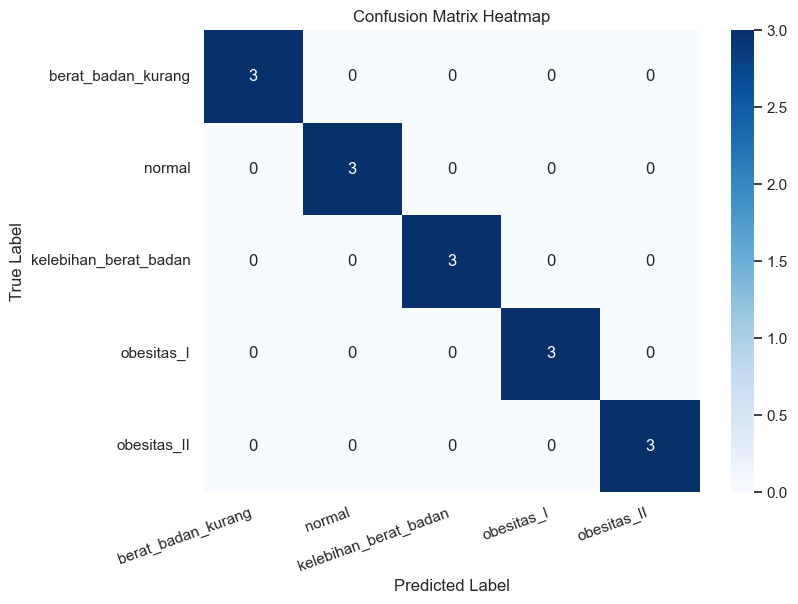

In [46]:
sns.set(font_scale=1)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(matrixKNN_baru, annot=True, fmt="d", cmap="Blues", xticklabels=urutan_baru, yticklabels=urutan_baru)
heatmap.set_xlabel("Predicted Label")
heatmap.set_ylabel("True Label")
plt.xticks(rotation=20, ha='right')
heatmap.set_title("Confusion Matrix Heatmap")
plt.show()

## Data hasil klasifikasi dari naive bayes dan knn

In [47]:
dataNV = X_testbaru.copy()
dataKNN = X_testbaru.copy()
data_NV_KNN = X_testbaru.copy()

In [48]:
dataNV['klasifikasi_naive_bayes'] = Y_predictNV
dataNV

,jenis_kelamin,umur,tinggi_badan_meter,berat_badan_kilogram,histori_keluarga_kelebihan_BB,konsumsi_tinggi_kalori,konsumsi_sayuran,makan_berat,ngemil,merokok,konsumsi_air_liter,pemantauan_kalori,aktifitas_fisik,penggunaan_perangkat_teknologi,konsumsi_alkohol,transporasi_biasa_digunakan,kelas_obesitas,klasifikasi_naive_bayes
606,Perempuan,31,1.672625,71,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_I,obesitas_II
71,Perempuan,19,1.650000,56,Ya,Ya,Selalu,3x,Sering,Ya,Lebih 2 liter,Ya,1-2 hari,3-5 jam,Sering,Sepeda motor,normal,normal
609,Perempuan,39,1.711621,84,Tidak,Ya,Selalu,1-2x,Kadang-kadang,Tidak,Lebih 2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Jalan kaki,obesitas_I,obesitas_I
678,Perempuan,37,1.560000,79,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II,obesitas_II
644,Perempuan,39,1.528746,79,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II,obesitas_II
275,Perempuan,20,1.550000,41,Tidak,Ya,Selalu,1-2x,Sering,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Sepeda motor,berat_badan_kurang,berat_badan_kurang
173,Perempuan,21,1.540000,47,Ya,Tidak,Selalu,3x,Selalu,Tidak,1-2 liter,Tidak,2-4 hari,0-2 jam,Tidak pernah,Sepeda motor,normal,berat_badan_kurang
510,Perempuan,25,1.643548,62,Tidak,Tidak,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,1-2 hari,0-2 jam,Tidak pernah,Mobil,kelebihan_berat_badan,kelebihan_berat_badan
548,Perempuan,21,1.641347,66,Ya,Ya,Selalu,1-2x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Sepeda motor,kelebihan_berat_badan,obesitas_II
389,Laki-laki,39,1.720000,86,Ya,Ya,Selalu,1-2x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Jalan kaki,obesitas_I,obesitas_II


In [49]:
dataKNN['klasifikasi_k_nearest_neighbor'] = Y_predictKNN
dataKNN

,jenis_kelamin,umur,tinggi_badan_meter,berat_badan_kilogram,histori_keluarga_kelebihan_BB,konsumsi_tinggi_kalori,konsumsi_sayuran,makan_berat,ngemil,merokok,konsumsi_air_liter,pemantauan_kalori,aktifitas_fisik,penggunaan_perangkat_teknologi,konsumsi_alkohol,transporasi_biasa_digunakan,kelas_obesitas,klasifikasi_k_nearest_neighbor
606,Perempuan,31,1.672625,71,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_I,obesitas_I
71,Perempuan,19,1.650000,56,Ya,Ya,Selalu,3x,Sering,Ya,Lebih 2 liter,Ya,1-2 hari,3-5 jam,Sering,Sepeda motor,normal,normal
609,Perempuan,39,1.711621,84,Tidak,Ya,Selalu,1-2x,Kadang-kadang,Tidak,Lebih 2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Jalan kaki,obesitas_I,obesitas_I
678,Perempuan,37,1.560000,79,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II,obesitas_II
644,Perempuan,39,1.528746,79,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II,obesitas_II
275,Perempuan,20,1.550000,41,Tidak,Ya,Selalu,1-2x,Sering,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Sepeda motor,berat_badan_kurang,berat_badan_kurang
173,Perempuan,21,1.540000,47,Ya,Tidak,Selalu,3x,Selalu,Tidak,1-2 liter,Tidak,2-4 hari,0-2 jam,Tidak pernah,Sepeda motor,normal,normal
510,Perempuan,25,1.643548,62,Tidak,Tidak,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,1-2 hari,0-2 jam,Tidak pernah,Mobil,kelebihan_berat_badan,kelebihan_berat_badan
548,Perempuan,21,1.641347,66,Ya,Ya,Selalu,1-2x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Sepeda motor,kelebihan_berat_badan,kelebihan_berat_badan
389,Laki-laki,39,1.720000,86,Ya,Ya,Selalu,1-2x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Jalan kaki,obesitas_I,obesitas_I


In [50]:
data_NV_KNN['klasifikasi_naive_bayes'] = Y_predictNV
data_NV_KNN['klasifikasi_k_nearest_neighbor'] = Y_predictKNN
data_NV_KNN

,jenis_kelamin,umur,tinggi_badan_meter,berat_badan_kilogram,histori_keluarga_kelebihan_BB,konsumsi_tinggi_kalori,konsumsi_sayuran,makan_berat,ngemil,merokok,konsumsi_air_liter,pemantauan_kalori,aktifitas_fisik,penggunaan_perangkat_teknologi,konsumsi_alkohol,transporasi_biasa_digunakan,kelas_obesitas,klasifikasi_naive_bayes,klasifikasi_k_nearest_neighbor
606,Perempuan,31,1.672625,71,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_I,obesitas_II,obesitas_I
71,Perempuan,19,1.650000,56,Ya,Ya,Selalu,3x,Sering,Ya,Lebih 2 liter,Ya,1-2 hari,3-5 jam,Sering,Sepeda motor,normal,normal,normal
609,Perempuan,39,1.711621,84,Tidak,Ya,Selalu,1-2x,Kadang-kadang,Tidak,Lebih 2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Jalan kaki,obesitas_I,obesitas_I,obesitas_I
678,Perempuan,37,1.560000,79,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II,obesitas_II,obesitas_II
644,Perempuan,39,1.528746,79,Ya,Ya,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Jalan kaki,obesitas_II,obesitas_II,obesitas_II
275,Perempuan,20,1.550000,41,Tidak,Ya,Selalu,1-2x,Sering,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Kadang-kadang,Sepeda motor,berat_badan_kurang,berat_badan_kurang,berat_badan_kurang
173,Perempuan,21,1.540000,47,Ya,Tidak,Selalu,3x,Selalu,Tidak,1-2 liter,Tidak,2-4 hari,0-2 jam,Tidak pernah,Sepeda motor,normal,berat_badan_kurang,normal
510,Perempuan,25,1.643548,62,Tidak,Tidak,Kadang-kadang,3x,Kadang-kadang,Tidak,1-2 liter,Tidak,1-2 hari,0-2 jam,Tidak pernah,Mobil,kelebihan_berat_badan,kelebihan_berat_badan,kelebihan_berat_badan
548,Perempuan,21,1.641347,66,Ya,Ya,Selalu,1-2x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Sepeda motor,kelebihan_berat_badan,obesitas_II,kelebihan_berat_badan
389,Laki-laki,39,1.720000,86,Ya,Ya,Selalu,1-2x,Kadang-kadang,Tidak,1-2 liter,Tidak,Tidak pernah,0-2 jam,Tidak pernah,Jalan kaki,obesitas_I,obesitas_II,obesitas_I


### download data hasil klasifikasi

In [51]:
# excel_file = pd.ExcelWriter("smote_data_hasil_klasifikasi.xlsx")
# data_NV_KNN.to_excel(excel_file)
# excel_file.save()

## Visualisasi data hasil klasifikasi

In [52]:
data_ringkasan = pd.DataFrame(columns=['kelas_obesitas', 'keterangan'])

# Menggabungkan nilai dari kolom obesity_class
data_ringkasan = pd.concat([data_ringkasan, pd.DataFrame({'kelas_obesitas': data_NV_KNN['kelas_obesitas'], 'keterangan': 'kelas_sebenarnya'})], ignore_index=True)

# Menggabungkan nilai dari kolom klasifikasi_naive_bayes
data_ringkasan = pd.concat([data_ringkasan, pd.DataFrame({'kelas_obesitas': data_NV_KNN['klasifikasi_naive_bayes'], 'keterangan': 'klasifikasi_naive_bayes'})], ignore_index=True)

# Menggabungkan nilai dari kolom klasifikasi_k_nearest_neighbor
data_ringkasan = pd.concat([data_ringkasan, pd.DataFrame({'kelas_obesitas': data_NV_KNN['klasifikasi_k_nearest_neighbor'], 'keterangan': 'klasifikasi_k_nearest_neighbor'})], ignore_index=True)

data_ringkasan

,kelas_obesitas,keterangan
0,obesitas_I,kelas_sebenarnya
1,normal,kelas_sebenarnya
2,obesitas_I,kelas_sebenarnya
3,obesitas_II,kelas_sebenarnya
4,obesitas_II,kelas_sebenarnya
5,berat_badan_kurang,kelas_sebenarnya
6,normal,kelas_sebenarnya
7,kelebihan_berat_badan,kelas_sebenarnya
8,kelebihan_berat_badan,kelas_sebenarnya
9,obesitas_I,kelas_sebenarnya


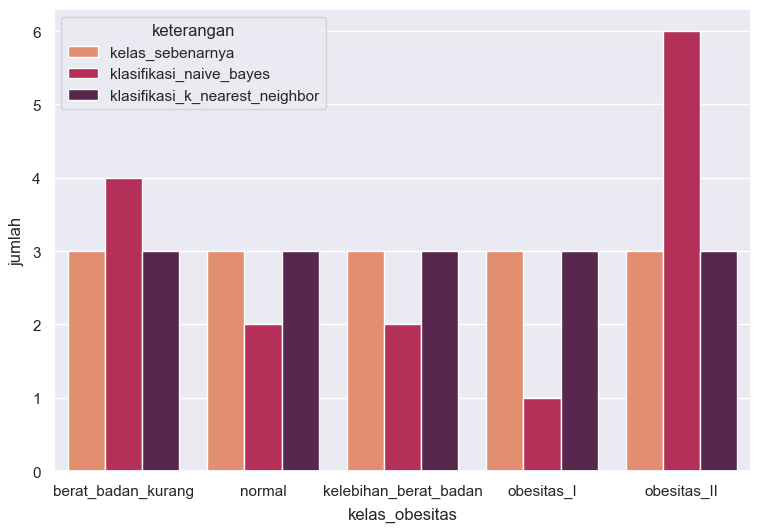

In [53]:
plt.figure(figsize=(9,6))
sns.countplot(x='kelas_obesitas', hue='keterangan', data=data_ringkasan, order=urutan_obesitas, palette='rocket_r')
# plt.xticks(rotation=20, ha='right')
# plt.tight_layout()
plt.xlabel('kelas_obesitas', labelpad=6)  # Add padding to the x-axis label
plt.ylabel('jumlah', labelpad=5)  # Add padding to the x-axis label

plt.show()

### Pembuktian visualisasi data hasil klasifikasi

In [54]:
kelas_obesitashasil = data_NV_KNN['kelas_obesitas'].value_counts().rename_axis('kelas_obesitas').reset_index(name='jumlah')
kelas_obesitashasil['kelas_obesitas'] = pd.Categorical(kelas_obesitashasil['kelas_obesitas'], categories=urutan_obesitas, ordered=True)
kelas_obesitashasil = kelas_obesitashasil.sort_values(by='kelas_obesitas')
kelas_obesitashasil

,kelas_obesitas,jumlah
3,berat_badan_kurang,3
1,normal,3
4,kelebihan_berat_badan,3
0,obesitas_I,3
2,obesitas_II,3


In [55]:
kelas_obesitashasilNV = data_NV_KNN['klasifikasi_naive_bayes'].value_counts().rename_axis('klasifikasi_naive_bayes').reset_index(name='jumlah')
kelas_obesitashasilNV['klasifikasi_naive_bayes'] = pd.Categorical(kelas_obesitashasilNV['klasifikasi_naive_bayes'], categories=urutan_obesitas, ordered=True)
kelas_obesitashasilNV = kelas_obesitashasilNV.sort_values(by='klasifikasi_naive_bayes')
kelas_obesitashasilNV

,klasifikasi_naive_bayes,jumlah
1,berat_badan_kurang,4
2,normal,2
3,kelebihan_berat_badan,2
4,obesitas_I,1
0,obesitas_II,6


In [56]:
kelas_obesitashasilKNN = data_NV_KNN['klasifikasi_k_nearest_neighbor'].value_counts().rename_axis('klasifikasi_k_nearest_neighbor').reset_index(name='jumlah')
kelas_obesitashasilKNN['klasifikasi_k_nearest_neighbor'] = pd.Categorical(kelas_obesitashasilKNN['klasifikasi_k_nearest_neighbor'], categories=urutan_obesitas, ordered=True)
kelas_obesitashasilKNN = kelas_obesitashasilKNN.sort_values(by='klasifikasi_k_nearest_neighbor')
kelas_obesitashasilKNN

,klasifikasi_k_nearest_neighbor,jumlah
3,berat_badan_kurang,3
1,normal,3
4,kelebihan_berat_badan,3
0,obesitas_I,3
2,obesitas_II,3


# Analisis perbandingan hasil

In [57]:
dataperbandingan = pd.read_excel('dataset/smote_perbandingan.xlsx')
dataperbandingan

,testing,data_latih,data_uji,latih_uji,model,akurasi,presisi,recal,F1,w_latih,w_uji,k_knn,roc_auc,Unnamed: 13
0,0.90,70.0,635.0,70:635,naive_bayes,0.47,0.44,0.47,0.41,0.004090,0.002630,NaN,NaN,NaN
1,NaN,NaN,NaN,70:635,k_nearest_neighbor,0.62,0.60,0.62,0.60,0.001189,0.105440,4.0,NaN,NaN
2,0.80,141.0,564.0,141:594,naive_bayes,0.51,0.51,0.51,0.45,0.008121,0.002256,NaN,NaN,NaN
3,NaN,NaN,NaN,141:594,k_nearest_neighbor,0.63,0.63,0.63,0.63,0.001047,0.093908,3.0,NaN,NaN
4,0.70,211.0,494.0,211:494,naive_bayes,0.55,0.51,0.55,0.48,0.008355,0.000000,NaN,NaN,NaN
5,NaN,NaN,NaN,211:494,k_nearest_neighbor,0.66,0.66,0.66,0.66,0.001281,0.070467,3.0,NaN,NaN
6,0.60,282.0,432.0,282:432,naive_bayes,0.51,0.53,0.51,0.46,0.008337,0.001994,NaN,NaN,NaN
7,NaN,NaN,NaN,282:432,k_nearest_neighbor,0.70,0.71,0.70,0.69,0.001401,0.072488,3.0,NaN,NaN
8,0.50,352.0,353.0,352:353,naive_bayes,0.54,0.54,0.54,0.54,0.008823,0.000000,NaN,NaN,NaN
9,NaN,NaN,NaN,352:353,k_nearest_neighbor,0.71,0.72,0.71,0.70,0.001383,0.070567,4.0,NaN,NaN


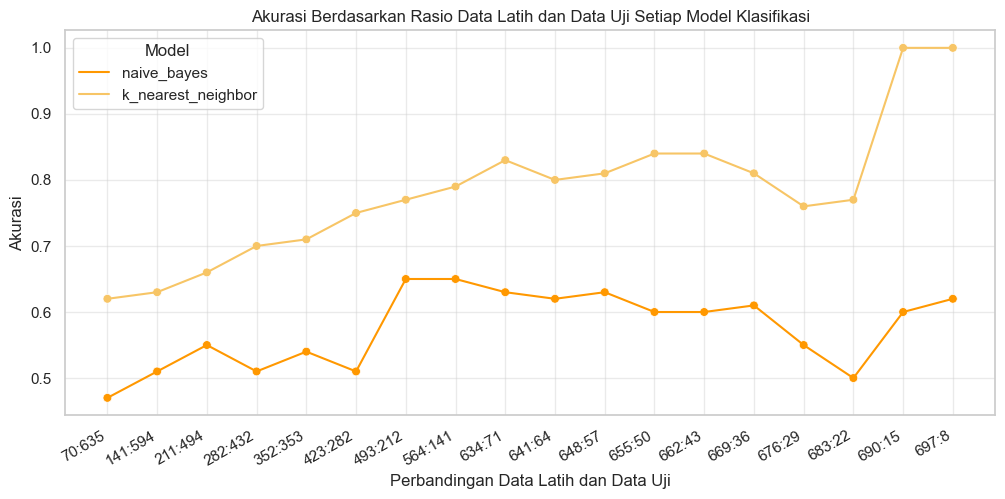

In [58]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

colors = {'naive_bayes': '#FF9800', 'k_nearest_neighbor': '#F7C566'}
sns.lineplot(x='latih_uji', y='akurasi', hue='model', data=dataperbandingan, markers=True, palette=colors)
sns.scatterplot(x='latih_uji', y='akurasi', hue='model', data=dataperbandingan, marker='o', s=40, legend=False, palette=colors)

plt.grid(alpha=0.4)
plt.title('Akurasi Berdasarkan Rasio Data Latih dan Data Uji Setiap Model Klasifikasi')
plt.xlabel('Perbandingan Data Latih dan Data Uji')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Akurasi')
plt.legend(title='Model')
plt.show()

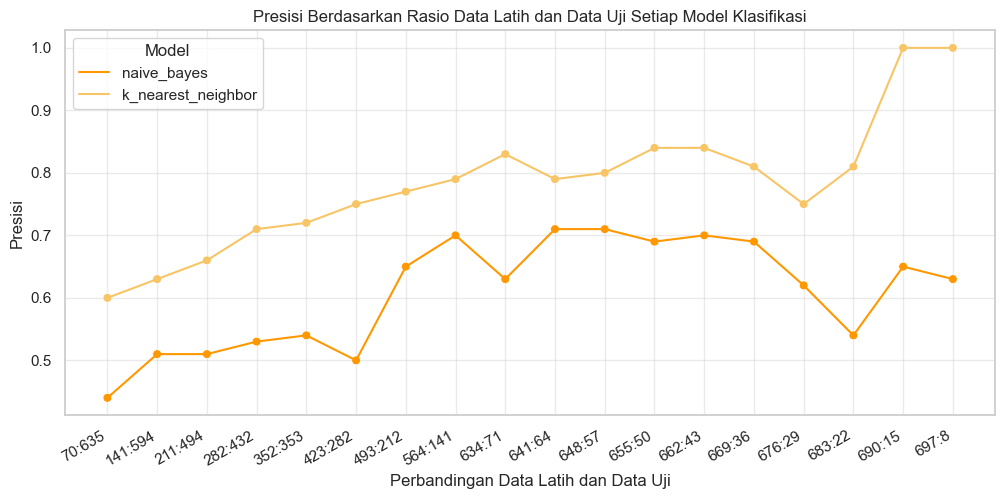

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

colors = {'naive_bayes': '#FF9800', 'k_nearest_neighbor': '#F7C566'}
sns.lineplot(x='latih_uji', y='presisi', hue='model', data=dataperbandingan, markers=True, palette=colors)
sns.scatterplot(x='latih_uji', y='presisi', hue='model', data=dataperbandingan, marker='o', s=40, legend=False, palette=colors)

plt.grid(alpha=0.4)
plt.title('Presisi Berdasarkan Rasio Data Latih dan Data Uji Setiap Model Klasifikasi')
plt.xlabel('Perbandingan Data Latih dan Data Uji')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Presisi')
plt.legend(title='Model')
plt.show()

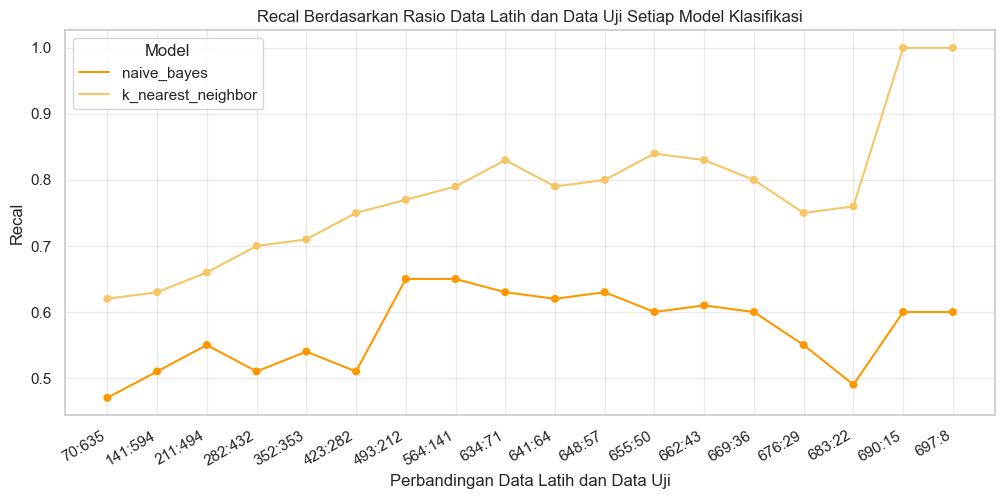

In [60]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

colors = {'naive_bayes': '#FF9800', 'k_nearest_neighbor': '#F7C566'}
sns.lineplot(x='latih_uji', y='recal', hue='model', data=dataperbandingan, markers=True, palette=colors)
sns.scatterplot(x='latih_uji', y='recal', hue='model', data=dataperbandingan, marker='o', s=40, legend=False, palette=colors)

plt.grid(alpha=0.4)
plt.title('Recal Berdasarkan Rasio Data Latih dan Data Uji Setiap Model Klasifikasi')
plt.xlabel('Perbandingan Data Latih dan Data Uji')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Recal')
plt.legend(title='Model')
plt.show()

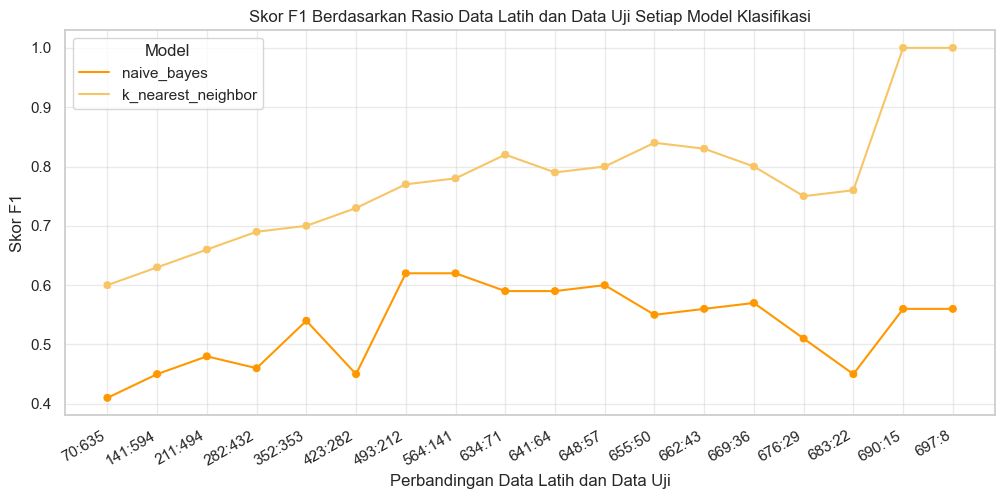

In [61]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

colors = {'naive_bayes': '#FF9800', 'k_nearest_neighbor': '#F7C566'}
sns.lineplot(x='latih_uji', y='F1', hue='model', data=dataperbandingan, markers=True, palette=colors)
sns.scatterplot(x='latih_uji', y='F1', hue='model', data=dataperbandingan, marker='o', s=40, legend=False, palette=colors)

plt.grid(alpha=0.4)
plt.title('Skor F1 Berdasarkan Rasio Data Latih dan Data Uji Setiap Model Klasifikasi')
plt.xlabel('Perbandingan Data Latih dan Data Uji')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Skor F1')
plt.legend(title='Model')
plt.show()

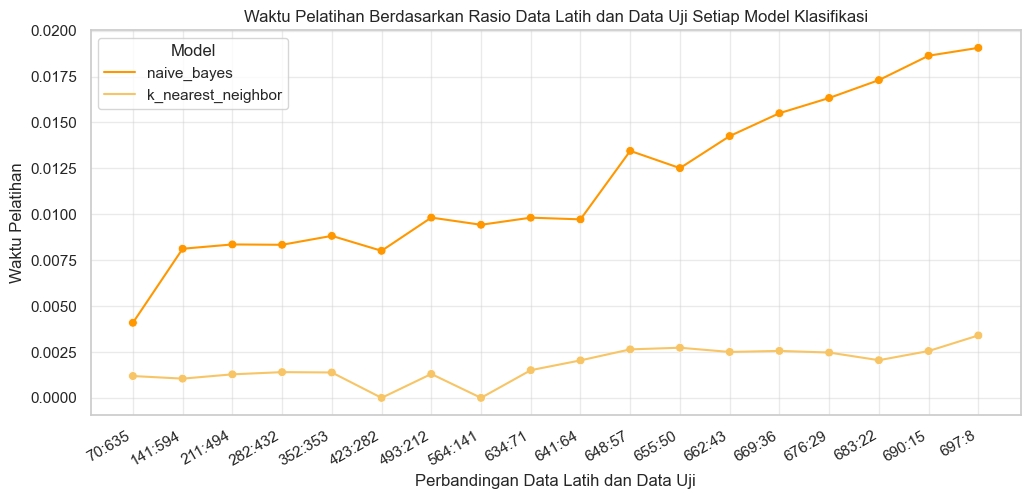

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

colors = {'naive_bayes': '#FF9800', 'k_nearest_neighbor': '#F7C566'}
sns.lineplot(x='latih_uji', y='w_latih', hue='model', data=dataperbandingan, markers=True, palette=colors)
sns.scatterplot(x='latih_uji', y='w_latih', hue='model', data=dataperbandingan, marker='o', s=40, legend=False, palette=colors)

plt.grid(alpha=0.4)
plt.title('Waktu Pelatihan Berdasarkan Rasio Data Latih dan Data Uji Setiap Model Klasifikasi')
plt.xlabel('Perbandingan Data Latih dan Data Uji')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Waktu Pelatihan')
plt.legend(title='Model')
plt.show()

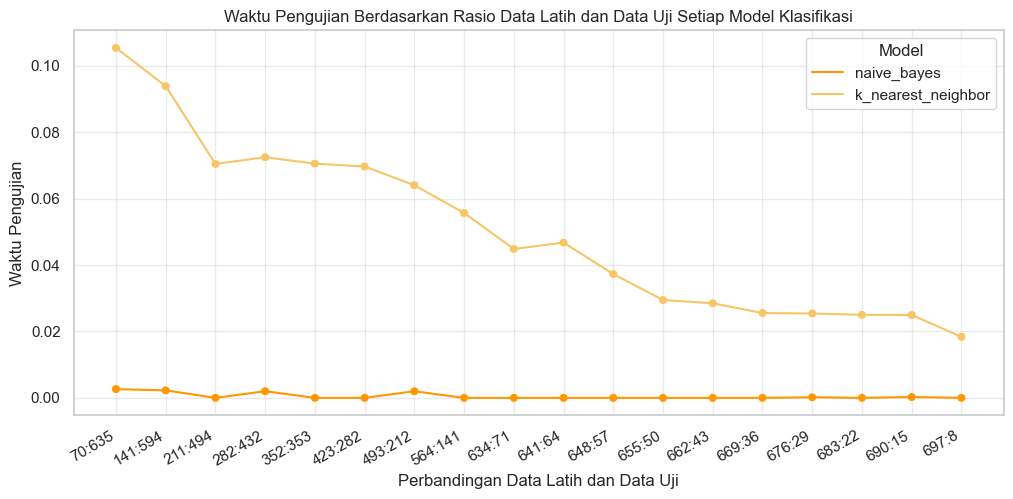

In [63]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

colors = {'naive_bayes': '#FF9800', 'k_nearest_neighbor': '#F7C566'}
sns.lineplot(x='latih_uji', y='w_uji', hue='model', data=dataperbandingan, markers=True, palette=colors)
sns.scatterplot(x='latih_uji', y='w_uji', hue='model', data=dataperbandingan, marker='o', s=40, legend=False, palette=colors)

plt.grid(alpha=0.4)
plt.title('Waktu Pengujian Berdasarkan Rasio Data Latih dan Data Uji Setiap Model Klasifikasi')
plt.xlabel('Perbandingan Data Latih dan Data Uji')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Waktu Pengujian')
plt.legend(title='Model')
plt.show()

## Analisis perbandingan hasil setiap algoritma

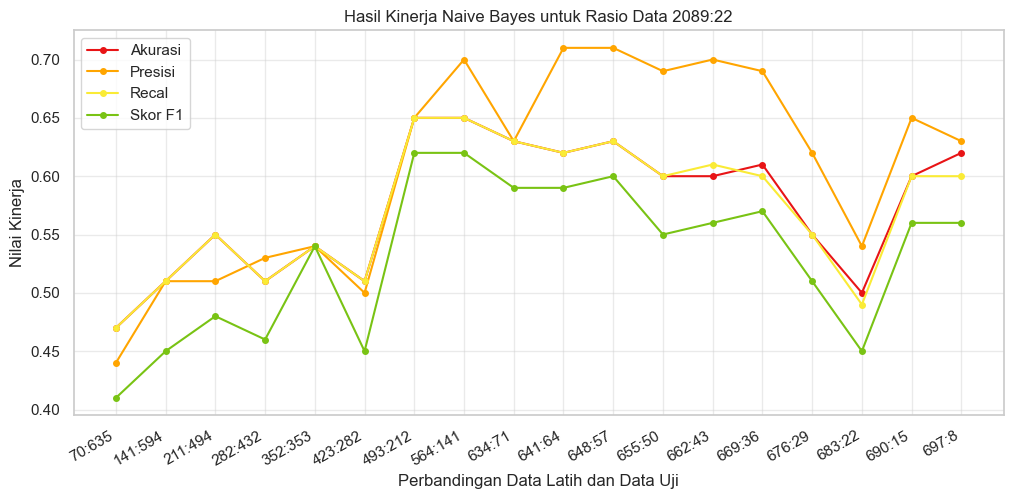

In [64]:
NV = dataperbandingan[dataperbandingan['model'] == 'naive_bayes']

sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

plt.plot(NV['latih_uji'], NV['akurasi'], 'o-',  markersize=4, color = '#E81416', label='Akurasi')
plt.plot(NV['latih_uji'], NV['presisi'], 'o-', markersize=4, color='#FFA500', label='Presisi')
plt.plot(NV['latih_uji'], NV['recal'], 'o-', markersize=4, color='#FAEB36', label='Recal')
plt.plot(NV['latih_uji'], NV['F1'], 'o-', markersize=4, color='#79C314', label='Skor F1')

plt.legend()
plt.grid(alpha=0.4)
plt.title("Hasil Kinerja Naive Bayes untuk Rasio Data 2089:22")
plt.xlabel('Perbandingan Data Latih dan Data Uji')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Nilai Kinerja')
plt.show()

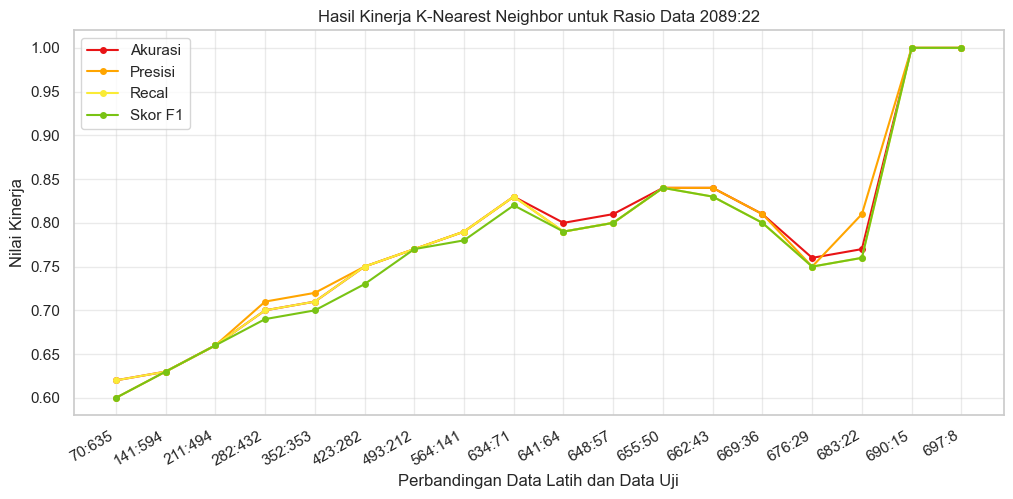

In [65]:
KNN = dataperbandingan[dataperbandingan['model'] == 'k_nearest_neighbor']

sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

plt.plot(KNN['latih_uji'], KNN['akurasi'], 'o-',  markersize=4, color = '#E81416', label='Akurasi')
plt.plot(KNN['latih_uji'], KNN['presisi'], 'o-', markersize=4, color='#FFA500', label='Presisi')
plt.plot(KNN['latih_uji'], KNN['recal'], 'o-', markersize=4, color='#FAEB36', label='Recal')
plt.plot(KNN['latih_uji'], KNN['F1'], 'o-', markersize=4, color='#79C314', label='Skor F1')

plt.legend()
plt.grid(alpha=0.4)
plt.title("Hasil Kinerja K-Nearest Neighbor untuk Rasio Data 2089:22")
plt.xlabel('Perbandingan Data Latih dan Data Uji')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Nilai Kinerja')
plt.show()

In [66]:
perbandinganK = pd.read_excel('dataset/perbandinganK.xlsx')
perbandinganK

,Nilai_K,Akurasi,Presisi,Recal,Skor_F1,Waktu_Pelatihan,Waktu_Pengujian
0,3,0.80,0.87,0.80,0.78,0.0030,0.0240
1,4,0.87,0.92,0.87,0.85,0.0027,0.0251
2,5,0.87,0.92,0.87,0.85,0.0025,0.0255
3,6,0.93,0.95,0.93,0.93,0.0020,0.0243
4,7,1.00,1.00,1.00,1.00,0.0025,0.0249
5,8,0.87,0.92,0.87,0.85,0.0032,0.0260
6,9,1.00,1.00,1.00,1.00,0.0029,0.0258


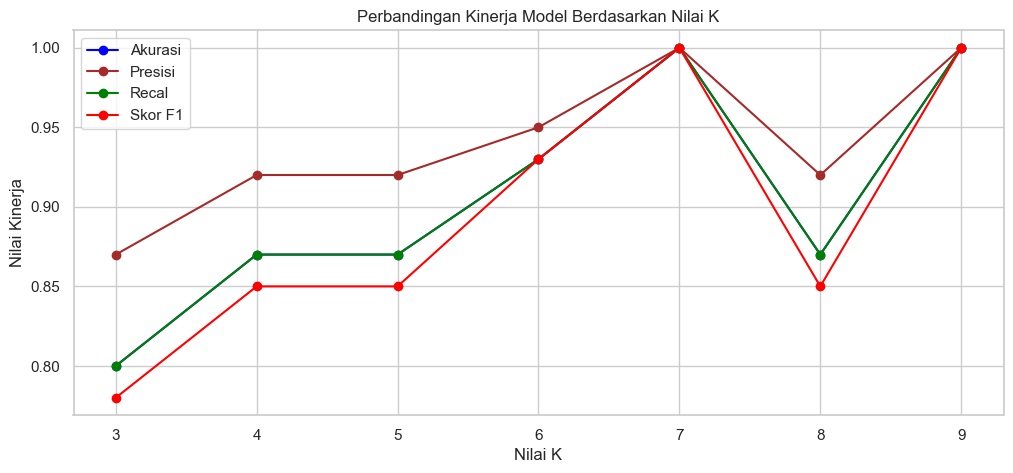

In [67]:
plt.figure(figsize=(12, 5))

# Plot setiap metrik
plt.plot(perbandinganK['Nilai_K'], perbandinganK['Akurasi'], marker='o', label='Akurasi', color='blue')
plt.plot(perbandinganK['Nilai_K'], perbandinganK['Presisi'], marker='o', label='Presisi', color='brown')
plt.plot(perbandinganK['Nilai_K'], perbandinganK['Recal'], marker='o', label='Recal', color='green')
plt.plot(perbandinganK['Nilai_K'], perbandinganK['Skor_F1'], marker='o', label='Skor F1', color='red')

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Kinerja Model Berdasarkan Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Nilai Kinerja')
plt.legend()
plt.grid(True)
plt.show()

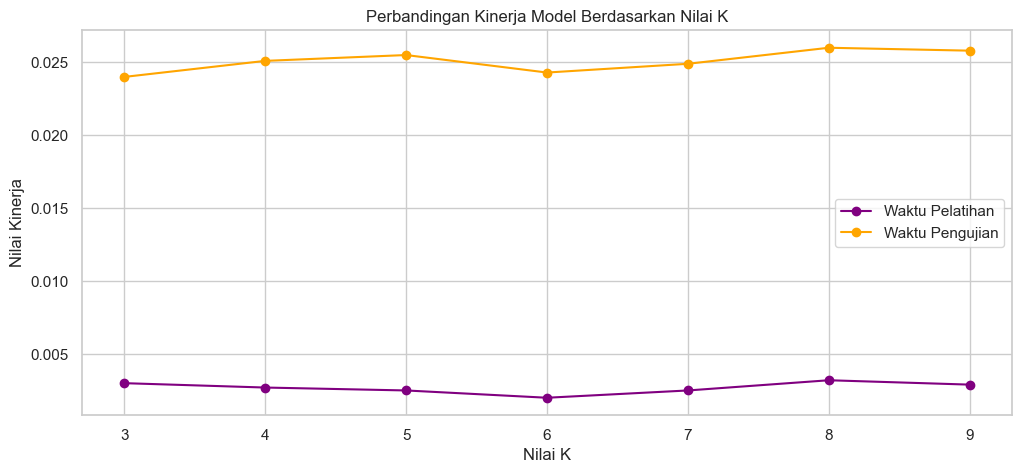

In [68]:
plt.figure(figsize=(12, 5))

# Plot setiap metrik
plt.plot(perbandinganK['Nilai_K'], perbandinganK['Waktu_Pelatihan'], marker='o', label='Waktu Pelatihan', color='purple')
plt.plot(perbandinganK['Nilai_K'], perbandinganK['Waktu_Pengujian'], marker='o', label='Waktu Pengujian', color='orange')

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Kinerja Model Berdasarkan Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Nilai Kinerja')
plt.legend()
plt.grid(True)
plt.show()